Import Library

In [555]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from sklearn import preprocessing
from skimage.feature import graycomatrix, graycoprops

Directory

In [556]:
image_directory_training="../Dataset/preprocessed_roi_augmentation/5_label/DataSet_Training"
image_directory_testing="../Dataset/preprocessed_roi_augmentation/5_label/DataSet_Testing"

Ekstraksi Fitur RGB

In [557]:
def ef_rgb_training(image_directory_training):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_training = []
    
  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]
    

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format RGB
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # mengambil nilai red (R) dari gambar
      red = rgb[:, :, 0]

      # mengambil nilai green (G) dari gambar
      green = rgb[:, :, 1]

      # mengambil nilai blue (B) dari gambar
      blue = rgb[:, :, 2]
      
      # menambahkan nilai RGB ke dalam list
      features_training.append([np.mean(red), np.mean(green), np.mean(blue), a])
                
  return features_training


def ef_rgb_testing(image_directory_testing):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_testing = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format RGB
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # mengambil nilai red (R) dari gambar
      red = rgb[:, :, 0]

      # mengambil nilai green (G) dari gambar
      green = rgb[:, :, 1]

      # mengambil nilai blue (B) dari gambar
      blue = rgb[:, :, 2]

      # menambahkan nilai RGB ke dalam list
      features_testing.append([np.mean(red), np.mean(green), np.mean(blue), a])

  return features_testing

Inisialisasi Data Training

In [558]:
#NORMALISASI DATA
extraction_feature = ef_rgb_training(image_directory_training)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
train_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    train_data.append(result_row)


In [559]:
# train_data = ef_rgb_training(image_directory_training)

In [560]:
# header tabel rgb
header = ["Red (R)", "Green (G)", "Blue (B)", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-----------+-------------+------------+---------+
|   Red (R) |   Green (G) |   Blue (B) |   Label |
+===========+=============+============+=========+
|  0.586099 |    0.660897 |   0.468724 |       1 |
+-----------+-------------+------------+---------+
|  0.563556 |    0.651419 |   0.507994 |       1 |
+-----------+-------------+------------+---------+
|  0.559448 |    0.66913  |   0.489165 |       1 |
+-----------+-------------+------------+---------+
|  0.559437 |    0.669138 |   0.489167 |       1 |
+-----------+-------------+------------+---------+
|  0.557307 |    0.67598  |   0.482142 |       1 |
+-----------+-------------+------------+---------+
|  0.557258 |    0.67592  |   0.482283 |       1 |
+-----------+-------------+------------+---------+
|  0.557276 |    0.675978 |   0.482179 |       1 |
+-----------+-------------+------------+---------+
|  0.567334 |    0.679424 |   0.465312 |       1 |
+-----------+-------------+------------+---------+
|  0.586482 |    0.667437 |   0

Inisialisasi Data Testing

In [561]:
#NORMALISASI DATA
extraction_feature = ef_rgb_testing(image_directory_testing)
data = [data[:-1] for data in extraction_feature]
label = [data[-1] for data in extraction_feature]

normalization_data = preprocessing.normalize(data, norm="l2")

# Menggabungkan data dan label
test_data = []
for data, label in zip(normalization_data, label):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [label]
    test_data.append(result_row)

In [562]:
# test_data = ef_rgb_testing(image_directory_testing)

In [563]:
# header tabel rgb
header = ["Red (R)", "Green (G)", "Blue (B)", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+-----------+-------------+------------+---------+
|   Red (R) |   Green (G) |   Blue (B) |   Label |
+===========+=============+============+=========+
|  0.573182 |    0.678664 |   0.459213 |       1 |
+-----------+-------------+------------+---------+
|  0.583061 |    0.649052 |   0.488642 |       1 |
+-----------+-------------+------------+---------+
|  0.583064 |    0.649041 |   0.488654 |       1 |
+-----------+-------------+------------+---------+
|  0.573731 |    0.675069 |   0.463805 |       1 |
+-----------+-------------+------------+---------+
|  0.583052 |    0.64906  |   0.488643 |       1 |
+-----------+-------------+------------+---------+
|  0.583056 |    0.649045 |   0.488657 |       1 |
+-----------+-------------+------------+---------+
|  0.583199 |    0.659357 |   0.474476 |       1 |
+-----------+-------------+------------+---------+
|  0.582956 |    0.649922 |   0.487611 |       1 |
+-----------+-------------+------------+---------+
|  0.583168 |    0.659321 |   0

Klasifikasi Model Naive Bayes

In [564]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [565]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [566]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [567]:
y_pred = model.predict(X_test)
y_pred

array([3, 4, 4, 3, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 4, 3, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 4, 3, 3, 3, 4, 3, 3, 3, 1, 3, 3, 3, 4, 3, 3, 3, 4, 4, 3, 1, 4,
       3, 1, 1, 1, 1, 1, 1, 3, 3, 4, 4, 3, 4, 4, 3, 3, 3, 5, 5, 5, 5, 5,
       5, 3, 5, 5, 5, 3, 3, 3, 5, 3, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5,
       2, 2, 5, 2, 5, 5])

In [568]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel rgb
header = ["Red (R)", "Green (G)", "Blue (B)","True Label", "Predict Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))


+-----------+-------------+------------+--------------+-----------------+
|   Red (R) |   Green (G) |   Blue (B) |   True Label |   Predict Label |
+===========+=============+============+==============+=================+
|  0.573182 |    0.678664 |   0.459213 |            1 |               3 |
+-----------+-------------+------------+--------------+-----------------+
|  0.583061 |    0.649052 |   0.488642 |            1 |               4 |
+-----------+-------------+------------+--------------+-----------------+
|  0.583064 |    0.649041 |   0.488654 |            1 |               4 |
+-----------+-------------+------------+--------------+-----------------+
|  0.573731 |    0.675069 |   0.463805 |            1 |               3 |
+-----------+-------------+------------+--------------+-----------------+
|  0.583052 |    0.64906  |   0.488643 |            1 |               4 |
+-----------+-------------+------------+--------------+-----------------+
|  0.583056 |    0.649045 |   0.488657

In [569]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.50      0.57        32
           2       0.86      1.00      0.93        32
           3       0.49      0.56      0.52        32
           4       0.21      0.12      0.16        32
           5       0.63      0.84      0.72        32

    accuracy                           0.61       160
   macro avg       0.57      0.61      0.58       160
weighted avg       0.57      0.61      0.58       160



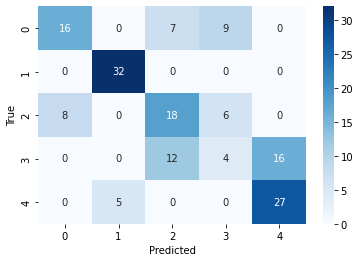

In [570]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [571]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.60625
